In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data = pd.read_csv('RYANDATA_consolidated.csv')

columns = data.columns
print(columns)

Index(['id', 'topic', 'authors', 'title', 'journal', 'year', 'vol_issue',
       'doi'],
      dtype='object')


In [3]:
papers = pd.DataFrame(data['title'])
topic = pd.DataFrame(data['topic'])
author = pd.DataFrame(data['authors'])

In [4]:
print(len(papers))
print(len(topic))
topic.head(2)
papers[0:100]

28179
28179


,title
0,Preparation of adenosine-loaded electrospun na...
1,The adaption of the bony microstructure of the...
2,Effect of caffeine on ovariectomy-induced oste...
3,The effect of formalin preservation time and t...
4,Accurate and efficient plate and rod microfini...
5,The effect of adipose-derived stem cells on en...
6,A biomechanical study of headless compression ...
7,Perforated h-beam implant can be used in femor...
8,In vitro effect of caveolin-1 as a slow-releas...
9,Accumulation of microdamage at complete and in...


In [5]:
topic['topic'].unique()

array(['BONE', 'CARDIO', 'CELLULAR', 'EVO/COMP', 'HEAD', 'ERGONOMICS',
       'JOINT/CARTILAGE', 'MODELING', 'MUSCLE', 'NEURAL', 'ORTHOPAEDICS',
       'REHABILITATION', 'SPORT/EXERCISE', 'TENDON/LIGAMENT', 'ROBOTICS'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

feat = ['topic']
for x in feat:
    le = LabelEncoder()
    le.fit(list(topic[x].values))
    topic[x] = le.transform(list(topic[x]))

In [7]:
topic['topic'].unique()

array([ 0,  1,  2,  4,  5,  3,  6,  7,  8,  9, 10, 11, 13, 14, 12])

In [8]:
le.inverse_transform([0])[0]

'BONE'

In [9]:
data['everything'] = pd.DataFrame(data['title'] + ' ' + data['authors'])
print(data['everything'].head(5))

0    Preparation of adenosine-loaded electrospun na...
1    The adaption of the bony microstructure of the...
2    Effect of caffeine on ovariectomy-induced oste...
3    The effect of formalin preservation time and t...
4    Accurate and efficient plate and rod microfini...
Name: everything, dtype: object


In [10]:
def change(t):
    t = t.split()
    return ' '.join([(i) for (i) in t if i not in stop])

In [11]:
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
stop.append('The')
stop.append('An')
stop.append('A')
stop.append('Do')
stop.append('Is')
stop.append('In')
stop[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
data['everything'].apply(change)

0        Preparation adenosine-loaded electrospun nanof...
1        adaption bony microstructure human glenoid cav...
2        Effect caffeine ovariectomy-induced osteoporos...
3        effect formalin preservation time temperature ...
4        Accurate efficient plate rod microfinite eleme...
5        effect adipose-derived stem cells enthesis hea...
6        biomechanical study headless compression screw...
7        Perforated h-beam implant used femoral neck fr...
8        vitro effect caveolin-1 slow-release material ...
9        Accumulation microdamage complete incomplete f...
10       Evaluation ostarine selective androgen recepto...
11       Optimal administration frequency dose teripara...
12       Effect low-intensity pulsed ultrasound autolog...
13       Osteoclast-responsive, injectable bone bisphos...
14       Effect long-term green tea polyphenol suppleme...
15       Adenoviral delivery adiponectin ameliorates os...
16       Novel adhesives sternal fixation stabilization.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, max_features=70000, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w+', use_idf=True, 
                            smooth_idf=True, sublinear_tf=True, stop_words = 'english')
vectors = vectorizer.fit_transform(data['everything'])
vectors.shape

(28179, 31277)

## Split Data

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
# from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(vectors,
                                                    topic['topic'],
                                                    test_size=0.2,
                                                    random_state = 0)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

type(papers)

(22543, 31277)
(22543,)
(5636, 31277)
(5636,)


pandas.core.frame.DataFrame

## Multinomial Naive Bayes

In [84]:
clf = MultinomialNB(alpha=.45)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print (metrics.f1_score(y_test, pred, average='macro'))
print (metrics.accuracy_score(y_test, pred))

0.5393441128668707
0.6437189496096523


## Logistic Regression

In [85]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(solver= 'sag',max_iter=200,random_state=450, multi_class='multinomial')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print (metrics.f1_score(y_test, pred, average='macro'))
print (metrics.accuracy_score(y_test, pred))

0.7242670039539808
0.7643718949609652


### Test clf model on string

In [86]:
text = ['neuromechanical effort proxies estimation computational']
text[0] = text[0].lower()
#text = list(text)
s = (vectorizer.transform(text))
#s = vectorizer.fit_transform(df)
print (s.shape)
d = (clf.predict(s))

le.inverse_transform(d)[0]

(1, 31277)


'MODELING'

### Save a model for later

In [49]:
from sklearn.externals import joblib
joblib.dump(clf, 'MultinomialNB.pkl')
print ("Model Saved")

Model Saved


In [52]:
clf = joblib.load('NeuralNetwork.pkl')
clf

MLPClassifier(activation='logistic', alpha=3e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.003, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Neural Network

In [36]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='logistic', alpha=0.00003, batch_size='auto',
                   beta_1=0.9, beta_2=0.999, early_stopping=False,
                   epsilon=1e-08, hidden_layer_sizes=(20,), learning_rate='constant',
                   learning_rate_init=0.003, max_iter=200, momentum=0.9,
                   nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
                   solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
                   warm_start=False)
clf.fit(X_train, y_train) 
pred = clf.predict(X_test)
print (metrics.f1_score(y_test, pred, average='macro'))
print (metrics.accuracy_score(y_test, pred))

0.7271838681305135
0.7581618168914124


In [59]:
text = ['Calcaneus range of motion underestimated by markers on running shoe heel']
#text = list(text)
s = (vectorizer.transform(text))
#s = vectorizer.fit_transform(df)
print (s.shape)
d = (clf.predict(s))
le.inverse_transform(d)[0]

(1, 31277)


'SPORT/EXERCISE'

## Extreme Gradient Boosting CV
### Takes a while and isn't great
https://xgboost.readthedocs.io/en/latest/tutorials/model.html

In [65]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test)

In [67]:
params = {
    'objective':'multi:softmax',
    'eval_metric':'mlogloss',
    'eta':0.025,
    'max_depth':10,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'min_child_weight':5,
    'num_class': 32
    
}

bst = xgb.cv(params, dtrain, num_boost_round=100,
early_stopping_rounds=40, nfold=5, verbose_eval=10)

bst_train = xgb.train(params, dtrain, num_boost_round=5)

p_test = bst_train.predict(dtest)


[0]	train-mlogloss:3.36523+0.00391516	test-mlogloss:3.36737+0.00485721
[10]	train-mlogloss:2.74487+0.0050922	test-mlogloss:2.7663+0.00668608
[20]	train-mlogloss:2.40075+0.00425035	test-mlogloss:2.4388+0.0104117
[30]	train-mlogloss:2.1581+0.00387748	test-mlogloss:2.21044+0.00999577
[40]	train-mlogloss:1.96765+0.00476091	test-mlogloss:2.03272+0.00940124
[50]	train-mlogloss:1.81689+0.00387246	test-mlogloss:1.89316+0.00780871
[60]	train-mlogloss:1.69377+0.0034988	test-mlogloss:1.78074+0.0067657
[70]	train-mlogloss:1.59146+0.00244749	test-mlogloss:1.68778+0.00570281
[80]	train-mlogloss:1.50526+0.00221001	test-mlogloss:1.61057+0.00515232
[90]	train-mlogloss:1.43172+0.00228521	test-mlogloss:1.54543+0.0042102


In [68]:

print (metrics.f1_score(y_test, p_test, average='macro'))
print (metrics.accuracy_score(y_test, p_test))

0.5115119525151769
0.5406316536550745


## Stochastic Gradient Descent (SGD) learning

In [87]:
from sklearn.linear_model import SGDClassifier
lsvc = SGDClassifier(max_iter=500, random_state=0, tol = 1e-3)
lsvc.fit(X_train, y_train) 
pred = lsvc.predict(X_test)
print (metrics.f1_score(y_test, pred, average='macro'))
print (metrics.accuracy_score(y_test, pred))

0.7367404841277659
0.7796309439318666


## Linear SVC

In [15]:
from sklearn.svm import LinearSVC
lsvc =LinearSVC()
lsvc.fit(X_train, y_train) 
pred = lsvc.predict(X_test)
print (metrics.f1_score(y_test, pred, average='macro'))
print (metrics.accuracy_score(y_test, pred))

0.7417950047417524
0.7789212207239177


                 precision    recall  f1-score   support

           BONE       0.76      0.79      0.77       386
         CARDIO       0.77      0.83      0.80       224
       CELLULAR       0.75      0.77      0.76       230
       EVO/COMP       0.80      0.69      0.74        99
           HEAD       0.84      0.87      0.85       689
     ERGONOMICS       0.86      0.84      0.85       457
JOINT/CARTILAGE       0.63      0.65      0.64       256
       MODELING       0.55      0.44      0.49       251
         MUSCLE       0.68      0.47      0.56       154
         NEURAL       0.74      0.80      0.77       333
   ORTHOPAEDICS       0.80      0.83      0.82      1225
 REHABILITATION       0.70      0.64      0.67       233
 SPORT/EXERCISE       0.89      0.85      0.87       216
TENDON/LIGAMENT       0.84      0.86      0.85       572
       ROBOTICS       0.70      0.68      0.69       311

      micro avg       0.78      0.78      0.78      5636
      macro avg       0.75   

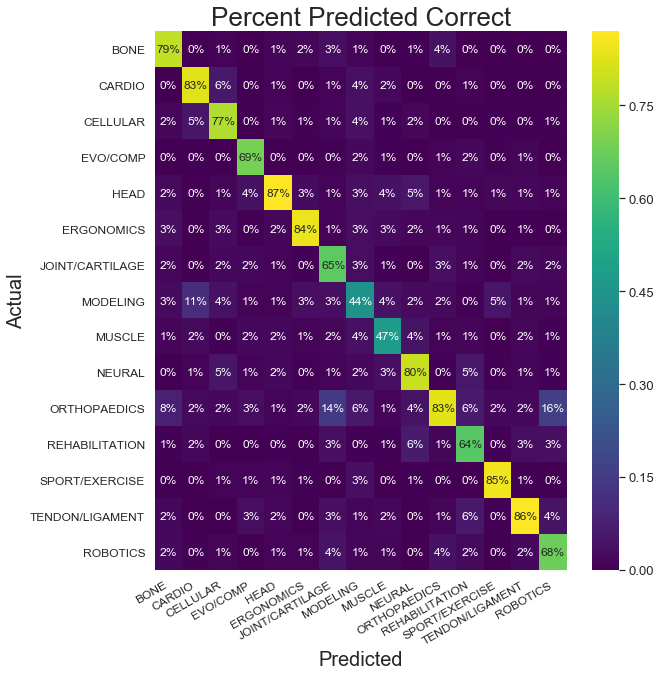

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

data['topic_id'] = data['topic'].factorize()[0]
topic_id_df = data[['topic',
                  'topic_id']].drop_duplicates().sort_values('topic_id')
topic_to_id = dict(topic_id_df.values)
id_to_topic = dict(topic_id_df[['topic_id','topic']].values)

model = lsvc

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_rowsum = [sum(row) for row in conf_mat]
conf_mat_perc = conf_mat / conf_mat_rowsum
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.2) #font size multiplier
sns.heatmap(conf_mat_perc, annot=True, fmt='.0%', cmap = 'viridis', annot_kws={"size": 12},
            xticklabels=topic_id_df.topic.values, yticklabels=topic_id_df.topic.values)

plt.ylabel('Actual',fontsize = 20)
plt.xlabel('Predicted',fontsize = 20)
plt.yticks(size = 12)
plt.xticks(size = 12, rotation=30,ha='right')
plt.title('Percent Predicted Correct', fontsize = 26)
plt.yticks( rotation='horizontal')
fig.tight_layout(pad = 2)


from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=data['topic'].unique()))

# Deep Learning
## https://github.com/akshaybhatia10/Book-Genre-Classification/blob/master/README.md
### RNN_LSTM_using_Glove_vectors

In [90]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf

## loading 400,000 words/vectors

In [93]:
wordsList = np.load('wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('wordVectors.npy')
print ('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


In [94]:
print (wordsList[:100])
print (len(wordsList))

['0', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as', 'it', 'by', 'at', '(', ')', 'from', 'his', "''", '``', 'an', 'be', 'has', 'are', 'have', 'but', 'were', 'not', 'this', 'who', 'they', 'had', 'i', 'which', 'will', 'their', ':', 'or', 'its', 'one', 'after', 'new', 'been', 'also', 'we', 'would', 'two', 'more', "'", 'first', 'about', 'up', 'when', 'year', 'there', 'all', '--', 'out', 'she', 'other', 'people', "n't", 'her', 'percent', 'than', 'over', 'into', 'last', 'some', 'government', 'time', '$', 'you', 'years', 'if', 'no', 'world', 'can', 'three', 'do', ';', 'president', 'only', 'state', 'million', 'could', 'us', 'most', '_', 'against', 'u.s.']
400000


In [98]:
data = pd.read_csv('RYANDATA_consolidated.csv')
columns = data.columns

papers = pd.DataFrame(data['title'])
topic = pd.DataFrame(data['topic'])
author = pd.DataFrame(data['authors'])

print(papers.head())
print(topic.head())

                                               title
0  Preparation of adenosine-loaded electrospun na...
1  The adaption of the bony microstructure of the...
2  Effect of caffeine on ovariectomy-induced oste...
3  The effect of formalin preservation time and t...
4  Accurate and efficient plate and rod microfini...
  topic
0  BONE
1  BONE
2  BONE
3  BONE
4  BONE


In [100]:
print(len((topic['topic'].unique())))
print((topic['topic'].unique()))

15
['BONE' 'CARDIO' 'CELLULAR' 'EVO/COMP' 'HEAD' 'ERGONOMICS'
 'JOINT/CARTILAGE' 'MODELING' 'MUSCLE' 'NEURAL' 'ORTHOPAEDICS'
 'REHABILITATION' 'SPORT/EXERCISE' 'TENDON/LIGAMENT' 'ROBOTICS']


In [101]:
numPapers = (len(papers))
numTopics = (len(topic))
print(numPapers)
print(numTopics)

28179
28179


In [112]:
aWordIndex = wordsList.index('biomechanics') #see if a word exists!
print (aWordIndex)
print (wordVectors[aWordIndex])
print (wordVectors[aWordIndex].shape)

73346
[-0.33056  -0.75191  -0.83187   0.040003 -0.32114   0.23684   0.53566
 -0.83674   1.0429   -0.43203   0.79284  -0.35558  -0.30834   0.68488
 -0.29077   0.22068  -0.06787   0.76226  -0.37807  -0.16478  -0.44117
  0.59595  -0.15942  -0.18084   0.60231  -0.11042  -0.23739   0.040095
 -0.91006  -0.24772  -0.32276  -0.026031  0.20072  -0.8322   -0.26025
  0.56193  -0.04521   0.75156   0.94171   0.86385  -0.28436  -0.2659
  0.19212   1.5326    0.74176   0.20821   1.3153    0.90003  -0.37785
 -0.52805 ]
(50,)


In [113]:
import tensorflow as tf
maxSeqLength = 10 #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("too")
firstSentence[2] = wordsList.index("had")
firstSentence[3] = wordsList.index("a")
firstSentence[4] = wordsList.index("love")
firstSentence[5] = wordsList.index("story")
#firstSentence[6] = wordsList.index("k")
#firstSentence[7] = wordsList.index("ki")
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

(10,)
[ 41 317  40   7 835 523   0   0   0   0]


In [114]:
with tf.Session() as sess:
    print("Word vector for a single word", tf.nn.embedding_lookup(wordVectors, firstSentence).eval()[0])
    print("\n")
    print("Dimension for a single word", tf.nn.embedding_lookup(wordVectors, firstSentence).eval()[0].shape)
    print ('\n')
    print("Shape of the vector for this sentence", tf.nn.embedding_lookup(wordVectors, firstSentence).eval().shape)
    print ("\n")
    print("Vector for this sentence", tf.nn.embedding_lookup(wordVectors, firstSentence).eval())

Instructions for updating:
Colocations handled automatically by placer.
Word vector for a single word [ 1.1891e-01  1.5255e-01 -8.2073e-02 -7.4144e-01  7.5917e-01 -4.8328e-01
 -3.1009e-01  5.1476e-01 -9.8708e-01  6.1757e-04 -1.5043e-01  8.3770e-01
 -1.0797e+00 -5.1460e-01  1.3188e+00  6.2007e-01  1.3779e-01  4.7108e-01
 -7.2874e-02 -7.2675e-01 -7.4116e-01  7.5263e-01  8.8180e-01  2.9561e-01
  1.3548e+00 -2.5701e+00 -1.3523e+00  4.5880e-01  1.0068e+00 -1.1856e+00
  3.4737e+00  7.7898e-01 -7.2929e-01  2.5102e-01 -2.6156e-01 -3.4684e-01
  5.5841e-01  7.5098e-01  4.9830e-01 -2.6823e-01 -2.7443e-03 -1.8298e-02
 -2.8096e-01  5.5318e-01  3.7706e-02  1.8555e-01 -1.5025e-01 -5.7512e-01
 -2.6671e-01  9.2121e-01]


Dimension for a single word (50,)


Shape of the vector for this sentence (10, 50)


Vector for this sentence [[ 1.1891e-01  1.5255e-01 -8.2073e-02 -7.4144e-01  7.5917e-01 -4.8328e-01
  -3.1009e-01  5.1476e-01 -9.8708e-01  6.1757e-04 -1.5043e-01  8.3770e-01
  -1.0797e+00 -5.1460e-01  1

In [116]:
numWords = []
for i,j in enumerate(papers['title']):
    counter = len(j.split())
    numWords.append(counter)  
    
print('The total number of words in all papers titles is', sum(numWords))
print('The average number of words in the each paper title is', sum(numWords)/len(numWords))

The total number of words in all papers is 415665
The average number of words in the each paper title is 14.750878313637815


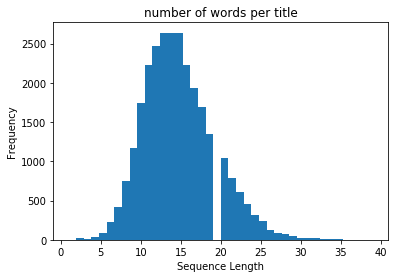

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 40)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
# plt.axis([0, 40, 0, 3000])
plt.title('number of words per title')
plt.show()

#so we set a max length larger than average 
maxSeqLength = 25

In [124]:
# Removes punctuation, parentheses, question marks, etc., and 
# leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

print (papers['title'][0])
print (cleanSentences(papers['title'][0]))
print ('\n')
print (papers['title'][500])
print (cleanSentences(papers['title'][500]))
print ('\n')
print (papers['title'][1000])
print (cleanSentences(papers['title'][1000]))
print ('\n')
print (papers['title'][1500])
print (cleanSentences(papers['title'][1500]))
print ('\n')
print (papers['title'][2000])
print (cleanSentences(papers['title'][2000]))


Preparation of adenosine-loaded electrospun nanofibers and their application in bone regeneration
preparation of adenosineloaded electrospun nanofibers and their application in bone regeneration


Femoral head necrosis: a finite element analysis of common and novel surgical techniques
femoral head necrosis a finite element analysis of common and novel surgical techniques


Adynamic bone decreases bone toughness during aging by affecting mineral and matrix
adynamic bone decreases bone toughness during aging by affecting mineral and matrix


Trabecular bone structure correlates with hand posture and use in hominoids
trabecular bone structure correlates with hand posture and use in hominoids


Finite element analysis for fatigue behaviour of a self-expanding nitinol peripheral stent under physiological biomechanical conditions
finite element analysis for fatigue behaviour of a selfexpanding nitinol peripheral stent under physiological biomechanical conditions


In [135]:
%%time
features = np.zeros((numPapers, maxSeqLength), dtype='int32')

fileCounter = 0

for i,j in enumerate(papers['title']): 
    indexCounter = 0
    cleanedLine = cleanSentences(j)
    split = cleanedLine.split()
    for word in split:
        try:
            features[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            features[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= maxSeqLength:
            break
    fileCounter = fileCounter + 1 

np.save('idsMatrix25', features)

CPU times: user 5min 1s, sys: 406 ms, total: 5min 1s
Wall time: 5min 1s


In [137]:
#to load features
features = np.load('idsMatrix25.npy')

In [138]:
features.shape


(28179, 25)

In [142]:
print (papers['title'][100]) #first paper title
features[100]

Marble-derived microcalcite improves bone healing in mice osteotomy


array([399999, 399999,  14191,   5226,   9062,      6,  10085, 211295,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0], dtype=int32)

In [145]:
#convert topic (labels) usign LabelEncoder 
from sklearn.preprocessing import LabelEncoder

feat = ['topic']
for x in feat:
    le = LabelEncoder()
    le.fit(list(topic[x].values))
    topic[x] = le.transform(list(topic[x]))
    
from keras.utils.np_utils import to_categorical #categorical variables (labels)
target = to_categorical(topic['topic'], 32)
target.shape

Using TensorFlow backend.


(28179, 32)

In [188]:
import scipy as sp
# define hyperparameters
batchSize = 64
lstmUnits = 2
numClasses = 32
iterations = 10
numDimensions = 25

#helper function to get batches
def get_batches(x, y, batch_size=100):
    
    n_batches = x.shape[0]//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for ii in range(0, x.shape[0], batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]

### Model

In [151]:
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

#embed layer
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors, input_data)

#tensorflow magic
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.50)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)

### Training

In [194]:
%%time
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    #Next Batch of reviews
    for ii, (x, y) in enumerate(get_batches(X_train, y_train, batch_size = batchSize)):
        sess.run(optimizer, {input_data: x, labels: y})
        #acc,loss = sess.run([accuracy,loss], {input_data: x, labels: y})
    print("Loss for {} epoch: {}".format(i, (sess.run(loss, {input_data: x, labels: y}))))    
    print("Accuracy for {} epoch: {}".format(i, (sess.run(accuracy, {input_data: x, labels: y})) * 100))
    
save_path = saver.save(sess, "models/test.ckpt", global_step=i)    

ValueError: setting an array element with a sequence.

# broke.

### go to https://github.com/akshaybhatia10/Book-Genre-Classification/blob/master/README.md for help